In [ ]:
# <center> Introduction to Python and Scikit-learn</center>
<center> Corinne Jones, TA </center>
<center> DATA 558, Spring 2020 </center>

# 1 Introduction
In this lab you will learn the following:
- How to install Python and Python packages
- How to perform basic operations in Python
- How to load packages and use common functions from NumPy
- How to read in and manipulate datasets with Pandas
- How to split a dataset into training and testing sets with scikit-learn
- How to fit nearest neighbors models in scikit-learn and use them to make predictions

Some parts of this lab are adapted from https://github.com/amueller/introduction_to_ml_with_python and the corresponding book.

## 1.1 Installing Python 
There are many ways to install Python, including:
- With Anaconda: https://www.anaconda.com/distribution/
- Directly from the Python website: https://www.python.org/downloads/

It tends to be easier to use Anaconda. We will be using Python 3.x. For these labs I will be using Python 3.7. Python 2.x used to be quite popular but reached its end of life at the beginning of this year.

## 1.2 Installing Packages
Like in R and many other languages, you will often need to use functions not built into Python. In this tutorial we will be using numpy, scikit-learn, matplotlib, and pandas. If you are using Anaconda, they may be already installed. If not, you can install them at the command line via
~~~
conda install numpy scikit-learn matplotlib pandas
~~~
On the other hand, if you are using pip to install packages, you can do so via
~~~
pip install numpy scikit-learn matplotlib pandas
~~~
On Windows, if you don't use Anaconda you may encounter problems installing packages. In that case, there are a bunch of packages you can install from here: http://www.lfd.uci.edu/~gohlke/pythonlibs/  This website contains Windows binaries for many packages. These files have strings like cp27 and cp36 in their names. These correspond to the Python versions. Make sure you also correctly download either the 32- or 64-bit version, depending on whether you have 32- or 64-bit Python.

In [19]:
!pip3 install numpy

## 1.3 Choosing a development environment
Like RStudio for R, there are integrated development environments (IDEs) for Python. These make life a lot easier! For the labs we will be using Jupyter notebooks. If you are using Anaconda, run
~~~
conda install jupyter nb_conda
~~~
in the command line. Otherwise, try running
~~~
pip3 install jupyter
~~~
To start a Jupyter notebook, go to the command line and type 
~~~
jupyter notebook
~~~

While Jupyter notebooks are great for class, they're not as convenient when writing large quantities of code. This Stack Overflow page has a nice comparison of many IDEs, so you can choose based on your preferences: http://stackoverflow.com/questions/81584/what-ide-to-use-for-python
PyCharm, Eclipse with PyDev, Komodo, Emacs, and Spyder seem to be some of the more popular ones.
Features of good IDEs include automatic code completion, an integrated debugger, error markup, version control integration (http://git-scm.com/)...

# 2 Basic operations and data types

As you'll see in this section, most of the operations in Python are similar to those in other languages like R and MATLAB. 

## 2.1 Arithmetic operations, lists, and dictionaries
Some of the most important things you need to know are:
- Python uses zero-based indexing.
- Indentations matter.
- The exponentiation operator is `**`, not `^`.

We will see these below.

In [0]:
# Don't worry about these two lines. They just tell the notebook to display all of the results.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [0]:
%config IPCompleter.greedy=True 

In [2]:
# Text after a pound sign is a comment.
(2 / 8) ** 3 + 2.1 * .003  # Two asterisks denote "to the power of". Not ^ like in R.

0.021925

In [3]:
2/8  # Unlike in Python 2, Python 3 doesn't perform integer division. If you don't know what this is, don't 
     # worry about it.

0.25

In [4]:
x = 3  # This sets the variable x to the number 3.
x_new = x+1  # Names can't have periods in them, unlike in R.
x_new 

4

In [5]:
y = [10, 20, 30]  # Create a list.
y
y[0]  # Python uses zero-based indexing!

[10, 20, 30]

10

In [0]:
y = ['hi', 3]

In [7]:
x2 = [4, 5, 6]
x2+y  # Adding two lists concatenates them. There is a separate array type we will introduce in a minute.

[4, 5, 6, 'hi', 3]

In [8]:
x2[-2]  # Using a minus sign before a number gives the element that is that far from the end, unlike in R

5

In [9]:
x2.append('hi')  # Lists can have different data types in them
x2

[4, 5, 6, 'hi']

In [10]:
my_dict = {'a': 10, 'b': 'hi', 'c': [1,2,3]}  # Create a "dictionary"
my_dict['c']  # Access the "value" corresponding to the "key" 'c' in the dictionary I created 

[1, 2, 3]

In [11]:
list(my_dict.values())

[10, 'hi', [1, 2, 3]]

In [12]:
list(my_dict.keys())

['a', 'b', 'c']

In [13]:
range(0, 10, 2)  # Range creates a sequence of integers starting at the first entry and ending BEFORE the 
                 # second entry. The third entry is the step size. The range() function is really useful when
                 # creating for loops.
list(range(0, 10, 2))  # Convert to a list for printing purposes

range(0, 10, 2)

[0, 2, 4, 6, 8]

Next we'll introduce `for` loops, `while` loops, and functions. At this point it's important to know that in Python it is necessary to follow indentation rules.

In [14]:
for i in range(-2, 5):  # Note (1) there are no parentheses required around the interior of the for statement; 
    print(abs(i))       # and (2) there is a colon at the end.

2
1
0
1
2
3
4


In [15]:
i = 0
j = 2
while i < 5 and not j >= 4:  # To check multiple conditions, use "and", "or", and/or "not"
    i += 1  # This is short for i = i+1
    j = j+1
    print(i, j)

1 3
2 4


In [18]:
def hello_world(my_string, freq):  # Define the function called hello_world with input arguments my_string and freq
    print(my_string*freq)  # String multiplication concatenates replicated strings
    return 3*freq, 2*my_string
    
hello_world('Hello, world!', 3) # Call the function hello_world

# 'hello'+'world'  # String addition concatenates strings

Hello, world!Hello, world!Hello, world!


(9, 'Hello, world!Hello, world!')

## 2.2 Importing packages
You can import a package a number of different ways in Python:

In [20]:
import numpy  # Import NumPy. You will refer to it as numpy later.
numpy.zeros(3)  # Create a numpy array with three zeros

array([0., 0., 0.])

In [21]:
import numpy as np  # Import numpy and refer to it as np later
np.zeros(3)

array([0., 0., 0.])

In [22]:
from numpy import *  # Import every function from numpy. You won't need to use the name numpy later 
                     # when referring to the functions
zeros(3)

array([0., 0., 0.])

In [23]:
from numpy import zeros  # Import only the zeros function
zeros(3)

array([0., 0., 0.])

In [24]:
from numpy import random  # Import the module "random" that exists within the package "numpy"
random.rand(3)  # Generate three random numbers from Unif(0, 1)

array([0.00290598, 0.44595385, 0.41955191])

In [25]:
import numpy.random
numpy.random.rand(3)

array([0.89642771, 0.46908564, 0.72199222])

I do not recommend frequently using the third and fourth methods. With these methods it's not easy to tell from looking at the code where the functions you call come from. Moreover, there could be name clashes between packages. 

## 2.3 NumPy

The NumPy package allows you to create arrays, generate random numbers, and perform quite a few arithmetic operations.

In [26]:
import numpy as np
x = np.array([[1, 2, 3], [4, 5, 6]])  # Create a 2-dimensional array
print("x:\n{}".format(x))  # Print it to the screen. \n says to go to the next line
                           # {} and .format() are used to print objects to the screen
                           # in Python 3.
print("x[1,2] =", x[1,2])   # Alternative way of printing to the screen. Is this the entry of x you expected?

x:
[[1 2 3]
 [4 5 6]]
x[1,2] = 6


To generate random numbers from a normal distribution we can use the np.random.normal() function. The first argument is the location (mean), the second argument is the scale (standard deviation), and the third argument tells it how many random numbers we want and in what format. size=(2,3) says that we want a 2x3 array as the output. You can also generate random numbers from many other distributions (see the documentation).

In [29]:
np.random.seed(0)  # Set the seed for reproducibility
my_sample = np.random.normal(loc=1, scale=2, size=(2, 3))
x
print('\n')
x+my_sample  # Add two arrays
print('\n')
np.sum(x)  # Add all of the entries in x

array([[1, 2, 3],
       [4, 5, 6]])

array([[5.52810469, 3.80031442, 5.95747597],
       [9.4817864 , 9.73511598, 5.04544424]])

21

In [30]:
help(np.random.normal)

Help on built-in function normal:

normal(...) method of numpy.random.mtrand.RandomState instance
    normal(loc=0.0, scale=1.0, size=None)
    
    Draw random samples from a normal (Gaussian) distribution.
    
    The probability density function of the normal distribution, first
    derived by De Moivre and 200 years later by both Gauss and Laplace
    independently [2]_, is often called the bell curve because of
    its characteristic shape (see the example below).
    
    The normal distributions occurs often in nature.  For example, it
    describes the commonly occurring distribution of samples influenced
    by a large number of tiny, random disturbances, each with its own
    unique distribution [2]_.
    
    .. note::
        New code should use the ``normal`` method of a ``default_rng()``
        instance instead; see `random-quick-start`.
    
    Parameters
    ----------
    loc : float or array_like of floats
        Mean ("centre") of the distribution.
    scale : fl

In [31]:
np.sqrt(x)  # Take the square root of x element-wise

array([[1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974]])

In [32]:
x[0, 0] = -1
np.sqrt(x)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


array([[       nan, 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974]])

In [33]:
x ** 2  # Square the entries in x element-wise 

array([[ 1,  4,  9],
       [16, 25, 36]])

In [34]:
x*x  # Element-wise multiplication of individual elements in x

array([[ 1,  4,  9],
       [16, 25, 36]])

In [35]:
y = x.T  # Transpose of x
print('y=', y)
print('Dimensions of y:', y.shape)  # Dimensions of y
print('Number of rows in y:', y.shape[0])  # Number of rows
print('Number of rows in y:', np.size(y, 0))  # Another way to get the number of rows

y= [[-1  4]
 [ 2  5]
 [ 3  6]]
Dimensions of y: (3, 2)
Number of rows in y: 3
Number of rows in y: 3


In [1]:
y @ x  # Matrix multiplication (python 3 only)
print('\n')
y.dot(x) # Another way to perform matrix multiplication
print('\n')
np.dot(y, x)  # Does the same thing

NameError: name 'y' is not defined

In [39]:
y[1:2, :]  # Get the second row of the matrix y and every column

array([[2, 5]])

In [40]:
y[1:, :]

array([[2, 5],
       [3, 6]])

NumPy has quite a few linear algebra routines. 

In [41]:
z = np.dot(x, x.T)
np.linalg.inv(z)  # Inverse of z

array([[ 0.15338645, -0.04780876],
       [-0.04780876,  0.02788845]])

In [42]:
np.linalg.eig(z)[0]  # Eigenvalues of z
np.linalg.eig(z)[1]  # Corresponding eigenvectors of z

array([ 5.89886365, 85.10113635])

array([[-0.94747869, -0.31981892],
       [ 0.31981892, -0.94747869]])

Throughout the labs I will try to include exercises for you, like the ones below. These are not graded, but should aid in your understanding and possibly help you directly or indirectly with the homework.

**Exercise 1.** Consider the vector $x = (1, 3, 5, 7, 9)$. Using Python, compute the square root of the sum of
the squares of its elements, i.e., $\sqrt{1^2 + 3^2 + 5^2 + 7^2 + 9^2}$.

In [45]:
x = np.array([1, 3, 5, 7, 9])
np.sqrt(sum(x**2))

12.84523257866513

In [46]:
np.linalg.norm(x)

12.84523257866513

 **Exercise 2.** Generate data using the following code:
~~~
np.random.seed(0)
A = np.random.uniform(size=(4,4))
A = A/np.linalg.norm(A, 1, axis=0)
~~~
Let $A_{i, j}$ denote the element in the $i^{th}$ row and $j^{th}$ column of $A$ (using 1-based indexing). Compute the following quantity without using a `for` loop:
$$ \frac{1}{2}\sum_{j=1}^4 |A_{2,j}-A_{4,j}| $$

In [48]:
np.random.seed(0)
A = np.random.uniform(size=(4,4))
A = A/np.linalg.norm(A, 1, axis=0)
0.5*np.sum(np.abs(A[1, :]-A[3, :]))
0.5*np.sum(np.abs(A[1:2, :]-A[3:4, :]))

0.3735075655303005

0.3735075655303005

## 2.4 A word of caution
Sometimes Python does things you may not expect. The code below can be unexpected and if you end up with a bug related to it, it can be very difficult to find!

In [0]:
A = np.ones((2, 2))  # Create a matrix of ones
A

In [0]:
B = A
B

In [0]:
B[0, 1] = 2  # Change one entry in B
B 
A  # This also changed the same entry in A!

Why did that happen? When you set B to A, you are copying a memory address, not creating a new copy of A. You should keep this in mind! To avoid this problem, you can use the copy method or the copy package:

In [0]:
import copy
A = np.ones((2, 2))  
B = A.copy()  # Copy A instead of its memory address
B[0, 1] = 2
B
A

**Exercise 3**: Find the bugs in the following lines of code:
1. 
~~~
5**1/2  # Compute the square root of 5
~~~
2. ~~~
range(1, 5)  # Create a list of numbers between 1 and 5, inclusive
~~~
3. ~~~
from numpy import sqrt
a = 4
sqrt = 2
b = 5
sqrt_b = sqrt(5)  # Compute the square root of 5
~~~
4. ~~~
for i in range(5, 0):  # Loop over the values from 5 down to 0 (inclusive)
        print(i)
~~~

In [52]:
# Answers
# Question 1
5**(1/2)

2.23606797749979

In [54]:
# Question 2
range(1, 6)

range(1, 6)

In [56]:
# Question 3
# the sqrt function was overriden by the variable
np.sqrt(5)

2.23606797749979

In [57]:
# Question 4
for i in range(5, -1, -1):
  print(i)

5
4
3
2
1
0


While you may think some of these bugs are contrived, you will likely encounter at least one of them in some (possibly more complicated) form in the future. 

## 2.5 Plotting
Matplotlib is the main plotting package in Python.

Text(0.5, 0, 'x label')

Text(0, 0.5, 'y label')

Text(0.5, 1.0, 'My Title')

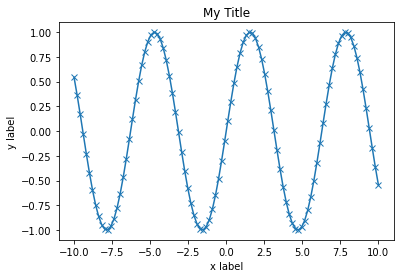

In [49]:
# The line below says to display the graphs inside this notebook
%matplotlib inline  
import matplotlib.pyplot as plt  # Import the matplotlib plotting library

# Generate a sequence of numbers from -10 to 10 with 100 steps in between
x = np.linspace(-10, 10, 100)
# Create a second array using sine
y = np.sin(x)
# The plot function plots the first argument on the x-axis, the second argument on the y-axis and 
# connects the points.
plt.plot(x, y, marker="x")
plt.xlabel('x label')  # Add a label to the x-axis
plt.ylabel('y label')  # Add a label to the y-axis
plt.title('My Title')  # Add a plot title

In [0]:
plt.scatter(x, y)  # Scatter doesn't connect the points

# 3 Reading and manipulating data

The library Pandas is quite popular for reading in datasets and manipulating them. Below are a few things you can do with it.

In [50]:
import pandas as pd

# Create a simple dataset of people
data = {'Name': ["John", "Anna", "Peter", "Linda"],
        'Location' : ["New York", "Paris", "Berlin", "London"],
        'Age' : [24, 13, 53, 33]
       }

data_pandas = pd.DataFrame(data)  # Turn the dictionary into a data frame
# IPython.display allows "pretty printing" of dataframes in the Jupyter notebook
from IPython.core.display import display
display(data_pandas)

,Name,Location,Age
0,John,New York,24
1,Anna,Paris,13
2,Peter,Berlin,53
3,Linda,London,33


In [0]:
# One of many possible ways to query the table:
# selecting all rows that have an age column greater than 30
data_pandas[data_pandas.Age > 30]

In [0]:
np.asarray(data_pandas.Age)  # Get the Age column and convert it to a numpy array

If you had a dataset that you wanted to load, you could use pd.read_table() or pd.read_csv(). For example,

In [0]:
# Load a dataset about cars
# sep=',' says that the data is comma-delimited
# header=0 denotes the fact that the header is the first line of data. If there's no header, use header=None
pd.read_csv('http://faculty.marshall.usc.edu/gareth-james/ISL/Auto.csv', sep=',', header=0)

# 4 Fitting machine learning models
The package scikit-learn is the most popular machine learning package in Python. It allows you to easily fit a wide variety of models. Here we'll show you how to fit nearest neighbors and ridge regression models in scikit-learn and use them to make predictions.

## 4.1 Loading data from scikit-learn
First we'll take a look at the iris dataset in scikit-learn. Suppose that we are interested in identifying the species of some Iris plants we found. We have information on the irises' petal and sepal widths and lengths. Moreover, we have the same information from a botanist on a bunch of already identified Iris plants that were labeled as being one of the species *setosa*, *versicolor*, or *virginica*. We will fit a machine learning model to the data with the known species type in order to classify our new plants.

First, let's load the dataset and see what it contains.

In [0]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()  # Load the iris dataset from scikit-learn

The scikit-learn datasets are objects that are similar to dictionaries, in that they have keys and values. In this case, the object contains the following keys and corresponding values:
- data: A numpy array with the measurements of the Iris plants (the predictors)
- target: A numpy array with the type of flower for each plant (the response)
- target_names: A list of strings, containing the three possible species of flowers 
- DESCR: A short description of the dataset
- feature_names: A list of strings, with a description of each feature

In [0]:
print("Keys of iris_dataset: {}".format(iris_dataset.keys()))

In [0]:
print(iris_dataset['DESCR'][:193] + "\n...")  # Get the first part of the dataset description

In [0]:
print("Target names: {}".format(iris_dataset['target_names']))  # Names of response categories

In [0]:
print("Feature names: {}".format(iris_dataset['feature_names']))  # Names of features

In [0]:
print("Type of data: {}".format(type(iris_dataset['data'])))  # Data type of features

In [0]:
print("Shape of data: {}".format(iris_dataset['data'].shape))  # 150 samples, each with 4 features

In [0]:
print("First five rows of data:\n{}".format(iris_dataset['data'][:5, :]))

In [0]:
print("Type of target: {}".format(type(iris_dataset['target'])))  # Data type of response

In [0]:
print("Shape of target: {}".format(iris_dataset['target'].shape))  # 150 samples (matches the dimensions from above)

The target (response) is coded as 0-2, with the numbering in the same order as the species names appear in iris_dataset['target_names']. In other words, 0 corresponds to *setosa*, 1 corresponds to *versicolor*, and 2 corresponds to *virginica*.

In [0]:
print("Target:\n{}".format(iris_dataset['target']))

## 4.2 Splitting data into training and test sets
In order to be able to assess our model's performance we will divide the data into training and test sets. Scikit-learn provides a nice function called `train_test_split()` that will do this for you. It shuffles the data and then randomly divides it into training and test sets. The first two arguments are the features (X) and the response (y). There are a number of additional optional arguments, including `random_state` (the state for the random number generator), and `test_size` (the fraction of samples to go into the test set).

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0, test_size=0.25)

In [0]:
print("X_train shape: {}".format(X_train.shape))  # 112 samples in the training set
print("y_train shape: {}".format(y_train.shape))

In [0]:
print("X_test shape: {}".format(X_test.shape))  # 38 samples in the test set
print("y_test shape: {}".format(y_test.shape))

## 4.3 Examining the data
Before running any analysis on your data, the first thing you should do is look at it. Check if there are any errors in the data set and whether there are any outliers. Maybe your problem could be solved without machine learning or you can't answer your problem because you don't have the appropriate data. It's better to find out these things now!

In [0]:
# Create a pandas dataframe from the data in X_train
# Label the columns using the strings in iris_dataset.feature_names
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# Create a scatter matrix from the dataframe and color by y_train
# s is the marker size and alpha is the transparency
grr = pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='o',
                        hist_kwds={'bins': 20}, s=60, alpha=.8)  

From the scatterplots we can see that the three types of Iris seem to be well-separated in terms of their sepal and petal lengths and widths. Thus, a machine learning algorithm should be able to predict the species well.

## 4.4 $k$-nearest neighbors
Let's try using a $k$-nearest neighbors model to classify the flowers. Here's how $k$-nearest neighbors works: Consider a training dataset $(x_i,y_i), i=1,\dots, n$ of features $x_i$ and labels $y_i$ and suppose we want to classify a new point $x_{\text{test}}$. The algorithm finds the $k$ nearest points $x_{k_1},\dots, x_{k_k}$ to $x_{\text{test}}$ from the training set. The predicted label for $x_{\text{test}}$ is then the most frequent class label from $y_{k_1},\dots, y_{k_k}$. (Here I use the indexing $k_j, j=1,\dots, k$ rather than just $j=1,\dots,k$ to denote the fact that the nearest points are not necessarily $x_1,\dots, x_k$.)

Consider an example: Suppose we have a training set $\{(2, 1), (2, 1), (3, 2), (5, 1), (-1, 2)\}$ and a new point $x_{\text{test}}=2$ that we want to classify. Let's choose to use a 3-nearest neighbor classifier. Then the three nearest points in the training set have labels $1, 1$, and $2$. Taking the mode of those values, we predict that $x_{\text{test}}$ should have label $1$. 

Note that in general the $x_i$'s don't need to be real values in $\mathbb{R}$. 

One nice thing about scikit-learn is that it contains many different machine learning algorithms, and the way you use them is standardized. I.e., the way you call one algorithm is similar to the way you call others.

### 4.4.1 Standardizing the data
It is often best to standardize the data before inputting it into your model. For a classifiation task we standardize the data by subtracting the mean of the predictors (the $x$'s) and dividing by their standard deviation. We can perform this using Scikit-learn's StandardScaler.

In [0]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### 4.4.2 Fitting the model

The $k$-nearest neighbors classifier is implemented in the KNeighborsClassifier class in the neighbors module. The first thing we have to do is load the classifier and instantiate it. If you don't know what classes are, don't worry about it. The important thing is knowing enough to be able to use scikit-learn.

In [0]:
from sklearn.neighbors import KNeighborsClassifier  # Load the classifier
knn = KNeighborsClassifier(n_neighbors=1)  # Instantiate the class by giving it n_neighbors (k)

The knn object we just created has a bunch of methods that you might find useful. These include:
- fit(X,y): Fit the model using X as training data and y as target values
- get_params(): Get parameters for this estimator.
- kneighbors([X, n_neighbors, return_distance]): Finds the n_neighbors nearest neighbors of a point and returns their distances if return_distance is set to True.
- predict(X): Predict the class labels for the provided data
- predict_proba(X): Return probability estimates for the test data X.
- score(X, y[, sample_weight]): Returns the mean accuracy on the given test data and labels.

The *fit* method should be the first one you use, since you need to fit the model before the model is able to do things like make predictions. In order to call one of these methods, you use knn.method_name, where method_name is the name of one of the methods from above. Aside from the kneighbors method, the others are standard across many sklearn algorithms. 

Let's try fitting our model now.

In [0]:
knn.fit(X_train, y_train)  # This modifies the knn object in place

### 4.4.3 Predicting and computing the accuracy
Now that we have fit the data we can try predicting on some new data.

In [0]:
X_new = np.array([[5, 2.9, 1, 0.2]])  # One new data point, but it needs to be in a 2-d array
print("X_new.shape: {}".format(X_new.shape))

In [0]:
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(
       iris_dataset['target_names'][prediction]))

Now let's see how well the model performs on our test set. 

In [0]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

In [0]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))  # Manually compute the accuracy

In [0]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))  # Use knn.score to compute the accuracy

We achieved an accuracy of 92%! In summary, the main functions we used that you need to know are below.

In [0]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

You may be wondering how to choose $k$. We will address this in a future lab.